# 0.データ読込及び俯瞰

In [1]:
from google.colab import drive
drive.mount('/content/drive')
myfolder = "drive/My Drive/Learn7-RolePlay/DATA/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Mounted at /content/drive


In [2]:
# pltを日本語翻訳
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 5.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=8b5a286608cd1c22974db6b15ffe10370365da05292b58f9d442e58383752700
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
# 顧客データ読込 67,564名
customer = pd.read_csv(myfolder + 'kokyaku_master.csv')
# 商品データ読込 332点
product = pd.read_csv(myfolder + 'shohin_master.csv')
# 購入データ読込 2015/4/1~12/31 9ヶ月間
purchase2 = pd.read_csv(myfolder + 'uriage_tran.csv')
# 予約データ読込 2016/1/1~3/9 2ヶ月と9日間
reserve2 = pd.read_csv(myfolder + 'yoyaku_tran.csv')

In [4]:
# 日付情報を datetime64 型に変換
import datetime
purchase2['date2'] = pd.to_datetime(purchase2['date'])
purchase = purchase2.loc[:,['transaction_cd', 'item_nm', 'item_id', 'item_cnt', 'user_id','date2']]
reserve2['date2'] = pd.to_datetime(reserve2['date'])
reserve = reserve2.loc[:,['transaction_cd', 'item_nm', 'item_id', 'item_cnt', 'user_id','date2']]

In [5]:
print(customer.shape)
print(product.shape)
print(purchase.shape)
print(reserve.shape)

(67564, 6)
(332, 4)
(91103, 6)
(30783, 6)


In [6]:
print(customer.info())
print(product.info())
print(purchase.info())
print(reserve.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67564 entries, 0 to 67563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        67564 non-null  int64 
 1   user_nm        67564 non-null  object
 2   user_adress    67564 non-null  object
 3   user_phone     67564 non-null  object
 4   user_mail      67564 non-null  object
 5   user_category  67564 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_nm        332 non-null    object 
 1   item_id        332 non-null    int64  
 2   price          329 non-null    float64
 3   item_category  332 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 10.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91103 e

In [7]:
# item_cntに負の値が入っていないことを確認
purchase.describe()

,item_id,item_cnt,user_id
count,91103.000000,91103.000000,91103.000000
mean,36036.747264,1.959046,34263.829281
std,13261.525935,1.147094,19512.863798
min,10001.000000,1.000000,2.000000
25%,40007.000000,1.000000,17419.000000
50%,40039.000000,1.000000,34486.000000
75%,40071.000000,3.000000,51167.000000
max,60007.000000,4.000000,67564.000000


In [8]:
# 予約データを日付昇順へ並べ替え
reserve.sort_values('date2')

,transaction_cd,item_nm,item_id,item_cnt,user_id,date2
9489,B0000000311185714035,化粧水,50009,1,43393,2016-01-01
5419,B0000000181600204148,緑茶,40005,2,33503,2016-01-01
26360,B0000000857100211261,さけ,40031,1,19964,2016-01-01
29996,B0000000973180350094,小麦粉,40028,1,38364,2016-01-01
8017,B0000000264093717970,ソーセージ,40050,2,61111,2016-01-01
...,...,...,...,...,...,...
27865,B0000000906644528909,サラダ,40018,3,49129,2016-03-31
1630,B0000000054492353406,かつお節,40041,1,42051,2016-03-31
16334,B0000000533238150590,鶏卵,40054,1,47855,2016-03-31
13793,B0000000451470141477,わかめ,40066,1,5300,2016-03-31


# 1-1.購入データに商品/顧客データを結合

In [9]:
# 購入データに商品/顧客データを結合
purchase4 = pd.merge(purchase,product,on='item_id',how='left')
purchase5 = pd.merge(purchase4,customer,on='user_id',how='left')
purchase = purchase5.drop(columns=['user_nm','user_adress','user_phone','user_mail','item_nm_y'])
# 購入データ内の NaN を0に置換
purchase = purchase.fillna(0)
purchase

,transaction_cd,item_nm_x,item_id,item_cnt,user_id,date2,price,item_category,user_category
0,A0000000000002649027,Ｙシャツ（長袖）・白,10007,1,65773,2015-04-01,1200.0,衣料品,M1
1,A0000000000002649028,チェックシャツ（長袖）・黒,10012,1,36721,2015-04-01,2000.0,衣料品,F2
2,A0000000000002649029,コットンシャツ（長袖）・白,10013,1,52458,2015-04-01,1400.0,衣料品,M3
3,A0000000000002649030,ポロシャツ（鹿の子）・黒,10018,1,65933,2015-04-01,1300.0,衣料品,F1
4,A0000000000002649031,ジーンズ（ストレートフィット）,10037,1,25416,2015-04-01,3500.0,衣料品,M2
...,...,...,...,...,...,...,...,...,...
91098,A0000000000002740125,トレーニングウエア,60004,1,14090,2015-12-31,12000.0,娯楽,M2
91099,A0000000000002740126,トレーニングウエア,60004,1,54957,2015-12-31,12000.0,娯楽,F2
91100,A0000000000002740127,トレーニングウエア,60004,1,59700,2015-12-31,12000.0,娯楽,M1
91101,A0000000000002740128,組立がん具,60006,1,1158,2015-12-31,4000.0,娯楽,M1


In [10]:
# 購入データ内の合計売上金額を確認
data = sum(purchase.price)
print(data)
# ひと月平均 17,500,122円

157501100.0


In [11]:
# 購入データ内の月別売上金額を集計
purchase['month'] = purchase['date2'].dt.month
purchase6 = pd.DataFrame(purchase.groupby('month').sum()).reset_index().sort_values("month")
purchase6

,month,item_id,item_cnt,user_id,price
0,4,344659358,18531,321257225,15718400.0
1,5,400568007,21883,389837186,21908000.0
2,6,361555545,19157,334406621,22113100.0
3,7,356308323,20033,365467314,20208700.0
4,8,335975501,17979,301733207,9907100.0
5,9,340700519,18601,319895190,12117600.0
6,10,389272380,21323,361979871,14009800.0
7,11,343441705,18776,330324719,14482900.0
8,12,410574448,22192,396636306,27035500.0


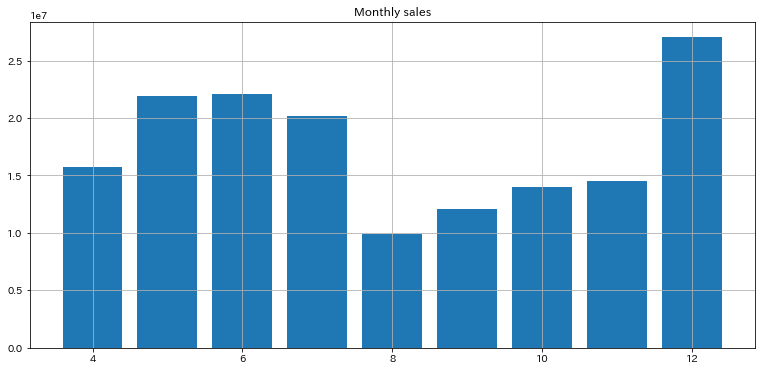

In [12]:
# 購入データ内の月別売上金額を確認
plt.figure(figsize=(13,6))
plt.title('Monthly sales')
plt.bar( purchase6["month"], purchase6['price'])
plt.grid(True)
plt.show()

In [13]:
# 購入データ内のカテゴリ別売上金額を集計
purchase7 = pd.DataFrame(purchase.groupby('item_category').sum()).reset_index().sort_values('price', ascending=False)
purchase7

,item_category,item_id,item_cnt,user_id,price,month
1,娯楽,109447414,1824,60193906,65606800.0,14657
4,衣料品,169462625,16783,570349770,43771900.0,134453
5,食品,2335516814,145699,2018879344,14819500.0,469413
3,衣料・小物,19866198,993,32523653,14736500.0,7939
2,家財,15186791,506,17041816,10297200.0,4070
0,医薬品,633575944,12670,422549150,8269200.0,101635


* 娯楽 41.6%
* 衣料品 27.8%
* 食品 9.4%
* 衣料・小物 9.3%
* 家財 6.5%
* 医薬品 5.2%
* 約70%の売上金額を、娯楽、衣料品カテゴリが占めている。

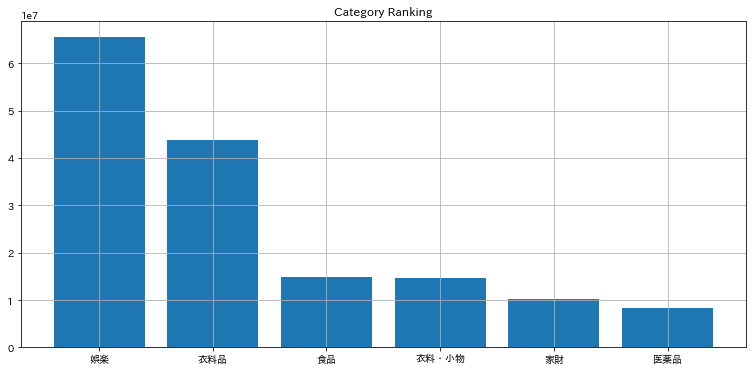

In [14]:
# 購入データ内のカテゴリ別売上金額を確認
plt.figure(figsize=(13,6))
plt.title('Category Ranking')
plt.bar( purchase7["item_category"], purchase7['price'])
plt.grid(True)
plt.show()

In [15]:
# 購入データ内の合計売上個数を確認
data = sum(purchase.item_cnt)
print(data)
# ひと月平均 19,830円

178475


In [16]:
# 購入データ内のカテゴリ別売上個数を集計
purchase7 = pd.DataFrame(purchase.groupby('item_category').sum()).reset_index().sort_values('item_cnt', ascending=False)
purchase7

,item_category,item_id,item_cnt,user_id,price,month
5,食品,2335516814,145699,2018879344,14819500.0,469413
4,衣料品,169462625,16783,570349770,43771900.0,134453
0,医薬品,633575944,12670,422549150,8269200.0,101635
1,娯楽,109447414,1824,60193906,65606800.0,14657
3,衣料・小物,19866198,993,32523653,14736500.0,7939
2,家財,15186791,506,17041816,10297200.0,4070


* 食品 81.6%
* 衣料品 9.4%
* 医薬品 7.1%
* 娯楽 1.0%
* 衣料・小物 0.5%
* 家財 0.3%
* 約98%の販売個数を、食品、衣料品、医薬品カテゴリが占めている。
* 売上金額構成比と合わせて考えると、娯楽カテゴリは単価が高く人気である

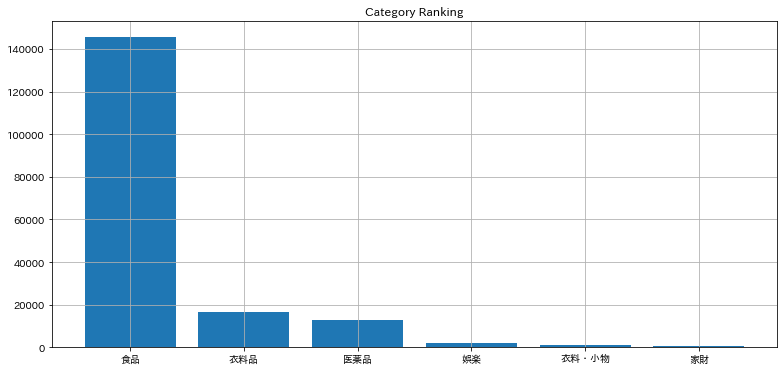

In [17]:
# 購入データ内のカテゴリ別売上個数を確認
plt.figure(figsize=(13,6))
plt.title('Category Ranking')
plt.bar( purchase7["item_category"], purchase7['item_cnt'])
plt.grid(True)
plt.show()

In [18]:
# 購入データ内の商品別売上金額を集計
purchase8 = pd.DataFrame(purchase.groupby('item_id').sum()).reset_index().sort_values('price', ascending=False)
purchase9 = pd.merge(purchase8,product,on='item_id',how='left')
purchase9.head(30)

,item_id,item_cnt,user_id,price_x,month,item_nm,price_y,item_category
0,60001,258,8682908,38700000.0,2028,ゴルフクラブ,150000.0,娯楽
1,60003,244,8401547,9760000.0,1937,スキー,40000.0,娯楽
2,60002,256,8318834,7680000.0,2093,テニスラケット,30000.0,娯楽
3,60005,263,8569134,5260000.0,2104,家庭用テレビゲーム機,20000.0,娯楽
4,20008,101,3583268,5050000.0,826,腕時計,50000.0,衣料・小物
5,60004,249,8400707,2988000.0,2074,トレーニングウエア,12000.0,娯楽
6,30018,20,576702,2000000.0,172,パーソナルコンピュータ,100000.0,家財
7,20006,77,2608995,1925000.0,556,ハンドバッグ,25000.0,衣料・小物
8,20007,93,3053682,1860000.0,772,旅行用かばん,20000.0,衣料・小物
9,50011,1190,38597263,1428000.0,9341,口紅,1200.0,医薬品


* タバコ以外の娯楽商品は全てTOP15にランクインしている。
* 顧客ニーズとして娯楽商品を強化するのが良いかもしれない。

In [19]:
# 購入データ内の商品別売上個数を集計
purchase10 = pd.DataFrame(purchase.groupby('item_id').sum()).reset_index().sort_values('item_cnt', ascending=False)
purchase11 = pd.merge(purchase10,product,on='item_id',how='left')
purchase11.head()
# TOP50 は全て食品

,item_id,item_cnt,user_id,price_x,month,item_nm,price_y,item_category
0,40072,1991,27234219,158000.0,6247,りんご,200.0,食品
1,40065,1958,26466575,76700.0,6167,干しのり,100.0,食品
2,40074,1897,24382932,146000.0,5927,バナナ,200.0,食品
3,40050,1892,26149669,300400.0,6155,ソーセージ,400.0,食品
4,40012,1882,25988947,149800.0,6027,せんべい,200.0,食品


* 売上個数でみると多くが食品カテゴリである。
* 食品カテゴリ以外で購入回数を伸ばせるものがあると、幅広いリピーター獲得の糸口となり得るかもしれない。

In [20]:
# 年間好調月であった12月のカテゴリ別売上
purchase12 = purchase.query('month == 12')
purchase13 = pd.DataFrame(purchase12.groupby('item_category').sum()).reset_index().sort_values('price', ascending=False)
purchase13
# 12月の月間売上 27,035,500円
# 娯楽シェア率 51% 年間平均より約10%上昇

,item_category,item_id,item_cnt,user_id,price,month
1,娯楽,24601679,410,14270456,13856800.0,4920
4,衣料品,22818309,2260,77838986,5943000.0,27120
2,家財,3541554,118,4156943,2595800.0,1416
3,衣料・小物,2700845,135,4476334,1858500.0,1620
5,食品,280852857,17748,244045694,1783800.0,84168
0,医薬品,76059204,1521,51847893,997600.0,18252


In [21]:
# 年間不調月であった8月のカテゴリ別売上
purchase14 = purchase.query('month == 8')
purchase15 = pd.DataFrame(purchase14.groupby('item_category').sum()).reset_index().sort_values('price', ascending=False)
purchase15
# 8月の月間売上 9,907,100円
# 娯楽金額は12月の4分の1
# 食品、医薬品は12月とほぼ同様のため、安定的な売上が見込めそうである。
# 8月に何か施策があると、年間売上が安定しそうだ。

,item_category,item_id,item_cnt,user_id,price,month
1,娯楽,5520380,92,2972708,3199200.0,736
4,衣料品,11268065,1116,36893575,2864200.0,8928
5,食品,247418083,15289,213780844,1547500.0,49432
3,衣料・小物,1240400,62,1824204,918000.0,496
0,医薬品,69808232,1396,45496581,899600.0,11168
2,家財,720341,24,765295,478600.0,192


In [22]:
# 年間不調月であった9~11月のカテゴリ別売上
purchase16 = purchase.query('month == [9,10,11]')
purchase17 = pd.DataFrame(purchase16.groupby('item_category').sum()).reset_index().sort_values('price', ascending=False)
purchase17
# 9~11月の3ヶ月間売上 40,610,300円
# 娯楽金額は12月の4分の1
# 食品、医薬品は12月とほぼ同様のため、安定的な売上が見込めそうである。
# 8月に何か施策があると、年間売上が安定しそうだ。

,item_category,item_id,item_cnt,user_id,price,month
1,娯楽,22921521,382,12034675,13669200.0,3847
4,衣料品,50556867,5007,170252459,13039300.0,50363
5,食品,784138109,48781,678711915,4995800.0,195748
3,衣料・小物,5861816,293,9947554,4451000.0,2922
0,医薬品,207024940,4140,137968149,2692800.0,41420
2,家財,2911351,97,3285028,1762200.0,990


* 娯楽 33.6% (41.6%)
* 衣料品 32.1% (27.8%)
* 食品 12.3% (9.4%)
* 衣料・小物 10.9% (9.3%)
* 医薬品 6.6% (5.2%)
* 家財 4.3% (6.5%)
* 娯楽、家財カテゴリは月間で変動がある。
* それ以外のカテゴリは年間平均を上回っているため、この期間に合わせた施策があると、年間売上が安定しそうだ。
* 仮に食料品、医薬品カテゴリが施策リターンが見込みにくいのであれば、衣料品にフォーカスした施策も良さそうである。

In [23]:
# 購入データ内のカテゴリ別売上金額を集計
purchase18 = pd.DataFrame(purchase.groupby('user_category').sum()).reset_index().sort_values('price', ascending=False)
purchase18

,user_category,item_id,item_cnt,user_id,price,month
3,M1,1135496152,60610,1050885807,50226400.0,244710
0,F1,671422995,38501,721195910,43427800.0,170633
1,F2,915351186,49659,847784903,29214500.0,198388
4,M2,259316486,13517,228163326,20001400.0,54621
2,F3,176523478,9671,165081571,7546100.0,37743
5,M3,124945489,6517,108426122,7084900.0,26072


* 男女比はほぼ同等
* M1/F1 累計売上 93,654,200円 59.4% (Age:20~34)
* F2/M2 累計売上 49,215,900円 31.2% (Age:35~49)
* F3/M3 累計売上 14,631,000円 9.3% (Age:50 over)
* 20~40代までの売上構成比 90%
* 累計売上 157,501,100円

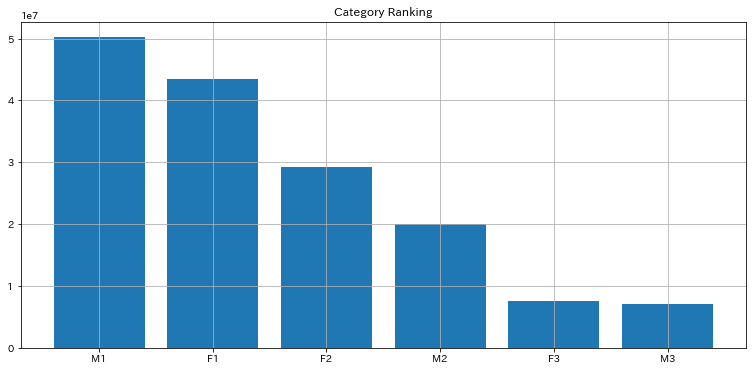

In [24]:
# 購入データ内のカテゴリ別売上金額を確認
plt.figure(figsize=(13,6))
plt.title('Category Ranking')
plt.bar( purchase18["user_category"], purchase18['price'])
plt.grid(True)
plt.show()

In [25]:
def Clothing(x):
    if x['item_category'] == '衣料品':
      return 1
    else:
      return 0
purchase['Clothing'] = purchase.apply(Clothing,axis=1)

In [26]:
def Accessories(x):
    if x['item_category'] == '衣料・小物':
      return 1
    else:
      return 0
purchase['Accessories'] = purchase.apply(Accessories,axis=1)

In [27]:
def HouseGoods(x):
    if x['item_category'] == '家財':
      return 1
    else:
      return 0
purchase['HouseGoods'] = purchase.apply(HouseGoods,axis=1)

In [28]:
def Food(x):
    if x['item_category'] == '食品':
      return 1
    else:
      return 0
purchase['Food'] = purchase.apply(Food,axis=1)

In [29]:
def Pharmaceuticals(x):
    if x['item_category'] == '医薬品':
      return 1
    else:
      return 0
purchase['Pharmaceuticals'] = purchase.apply(Pharmaceuticals,axis=1)

In [30]:
def Entertainment(x):
    if x['item_category'] == '娯楽':
      return 1
    else:
      return 0
purchase['Entertainment'] = purchase.apply(Entertainment,axis=1)

In [31]:
# 購入データ内のカテゴリ別売上個数を集計 (カテゴリ変数ありVer)
purchase19 = pd.DataFrame(purchase.groupby('item_category').sum()).reset_index().sort_values('item_cnt', ascending=False)
purchase19
# 食品カテゴリにおいてのみ、まとめ買いあり。 平均2.5個 / 1回

,item_category,item_id,item_cnt,user_id,price,month,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment
5,食品,2335516814,145699,2018879344,14819500.0,469413,0,0,0,58327,0,0
4,衣料品,169462625,16783,570349770,43771900.0,134453,16783,0,0,0,0,0
0,医薬品,633575944,12670,422549150,8269200.0,101635,0,0,0,0,12670,0
1,娯楽,109447414,1824,60193906,65606800.0,14657,0,0,0,0,0,1824
3,衣料・小物,19866198,993,32523653,14736500.0,7939,0,993,0,0,0,0
2,家財,15186791,506,17041816,10297200.0,4070,0,0,506,0,0,0


In [32]:
def normally(x):
    if x['month'] == 12:
      return 1
    elif x['month'] == 11:
      return 1
    elif x['month'] == 10:
      return 1
    else:
      return 0
purchase['normally'] = purchase.apply(normally,axis=1)

In [33]:
def often(x):
    if x['month'] == 9:
      return 1
    elif x['month'] == 8:
      return 1
    elif x['month'] == 7:
      return 1
    else:
      return 0
purchase['often'] = purchase.apply(often,axis=1)

In [34]:
def sometimes(x):
    if x['month'] == 6:
      return 1
    elif x['month'] == 5:
      return 1
    elif x['month'] == 4:
      return 1
    else:
      return 0
purchase['sometimes'] = purchase.apply(sometimes,axis=1)

In [35]:
# 購入データ内の月別購入回数を集計 (カテゴリ変数ありVer)
purchase20 = pd.DataFrame(purchase.groupby('month').sum()).reset_index()
purchase20

,month,item_id,item_cnt,user_id,price,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment,normally,often,sometimes
0,4,344659358,18531,321257225,15718400.0,1542,80,48,6140,1360,203,0,0,9373
1,5,400568007,21883,389837186,21908000.0,2273,143,78,7076,1485,247,0,0,11302
2,6,361555545,19157,334406621,22113100.0,1586,94,97,6220,1446,323,0,0,9766
3,7,356308323,20033,365467314,20208700.0,2999,186,44,6115,1322,167,0,10833,0
4,8,335975501,17979,301733207,9907100.0,1116,62,24,6179,1396,92,0,8869,0
5,9,340700519,18601,319895190,12117600.0,1576,97,21,6233,1317,113,0,9357,0
6,10,389272380,21323,361979871,14009800.0,1562,107,35,7199,1486,129,10518,0,0
7,11,343441705,18776,330324719,14482900.0,1869,89,41,6151,1337,140,9627,0,0
8,12,410574448,22192,396636306,27035500.0,2260,135,118,7014,1521,410,11458,0,0


* 総購入回数 91,103回
* normally(頻繁に) 30,441回 33.4%
* often(しばしば) 29,059回 31.9%
* sometimes(ときどき) 31,603回 34.7%

# 1-2.顧客データ毎に集計

In [36]:
# 顧客データ毎に集計
customer2 = pd.DataFrame(purchase.groupby('user_id').sum()).reset_index().sort_values('price', ascending=False)
customer3 = pd.merge(customer2,customer,on='user_id',how='left')
customer = customer3.drop(columns=['item_id','month','user_nm','user_adress','user_phone','user_mail'])
customer.head()

,user_id,item_cnt,price,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment,normally,often,sometimes,user_category
0,63168,2,300000.0,0,0,0,0,0,2,1,1,0,M1
1,33555,2,300000.0,0,0,0,0,0,2,1,0,1,M1
2,36190,2,200000.0,0,0,1,0,0,1,2,0,0,M2
3,1229,3,190400.0,0,0,0,1,0,2,2,0,1,M1
4,57189,2,180000.0,0,0,0,0,0,2,0,1,1,M1


In [37]:
# 顧客データ内の購入/未購入人数を確認
data = customer.query('price == 0.0')
data.user_id.count()

54

* 顧客人数 67,564名 (顧客データ) 
* 顧客人数 28,509名 (購入データ) 顧客データ比42%
* 購入あり 28,455名
* 購入なし 54名

In [38]:
customer['user_id'].count()

28509

In [39]:
# 購入データ内の合計売上個数を確認
data = sum(customer.price)
print(data)
# 購入実績者一人当たりの累計平均購入金額 5,535円

157501100.0


In [40]:
# 購入総額に基づいたデシルランクを付与
total_1_qt10 = customer["price"].quantile(0.1)
total_1_qt20 = customer["price"].quantile(0.2)
total_1_qt30 = customer["price"].quantile(0.3)
total_1_qt40 = customer["price"].quantile(0.4)
total_1_qt50 = customer["price"].quantile(0.5)
total_1_qt60 = customer["price"].quantile(0.6)
total_1_qt70 = customer["price"].quantile(0.7)
total_1_qt80 = customer["price"].quantile(0.8)
total_1_qt90 = customer["price"].quantile(0.9)

def add_d_rank1(x,qt10,qt20,qt30,qt40,qt50,qt60,qt70,qt80,qt90):
  if x["price"] > qt90:
    return 1
  elif x["price"] > qt80:
    return 2
  elif x["price"] > qt70:
    return 3
  elif x["price"] > qt60:
    return 4
  elif x["price"] > qt50:
    return 5
  elif x["price"] > qt40:
    return 6
  elif x["price"] > qt30:
    return 7
  elif x["price"] > qt20:
    return 8
  elif x["price"] > qt10:
    return 9
  else:
    return 10

customer["Decil_score"] = customer.apply( add_d_rank1, qt10=total_1_qt10, qt20=total_1_qt20, qt30=total_1_qt30, qt40=total_1_qt40, qt50=total_1_qt50, qt60=total_1_qt60, qt70=total_1_qt70, qt80=total_1_qt80, qt90=total_1_qt90, axis=1)
customer.tail()

,user_id,item_cnt,price,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment,normally,often,sometimes,user_category,Decil_score
28504,6363,1,0.0,1,0,0,0,0,0,1,0,0,M1,10
28505,28911,1,0.0,1,0,0,0,0,0,1,0,0,F3,10
28506,4132,1,0.0,1,0,0,0,0,0,0,1,0,F1,10
28507,40788,1,0.0,1,0,0,0,0,0,0,0,1,M1,10
28508,38234,1,0.0,1,0,0,0,0,0,1,0,0,F1,10


In [41]:
# D_RANK_1に人数を集約
d_score1 = customer.groupby("Decil_score")["user_id"].count().reset_index()
# D_RANK_1に売上を集約
d_score2 = customer.groupby("Decil_score")["price"].sum().reset_index()
# 集約した変数を結合
d_score = pd.merge(d_score1, d_score2, on="Decil_score", how="left")
d_score['user_id_ttl'] = d_score['user_id']
# ひと月平均売上（円/月）
d_score["Total_1_mean"] = round(d_score["price"]/9,0)
# 売上構成比
d_score["Total_1_Ratio"] = d_score["Total_1_mean"] / d_score["Total_1_mean"] . sum()
# 累積売上構成比
d_score["Total_1_Ratio_cum"] = d_score["Total_1_Ratio"].cumsum()
# 一人あたりの月平均購入金額
d_score["Total_1_Ratio_mean_person"] = ( d_score["Total_1_mean"] / d_score["user_id"] ).astype(int)
# 不要なカラムを削除
d_score.drop(columns=["price","user_id"], inplace=True)
d_score

,Decil_score,user_id_ttl,Total_1_mean,Total_1_Ratio,Total_1_Ratio_cum,Total_1_Ratio_mean_person
0,1,2768,11069000.0,0.632510,0.632510,3998
1,2,2922,2341722.0,0.133812,0.766322,801
2,3,2804,1349144.0,0.077093,0.843415,481
3,4,2817,956889.0,0.054679,0.898094,339
4,5,2835,623333.0,0.035619,0.933713,219
5,6,1668,273978.0,0.015656,0.949369,164
6,7,3172,384722.0,0.021984,0.971353,121
7,8,3211,256611.0,0.014663,0.986016,79
8,9,824,45778.0,0.002616,0.988632,55
9,10,5488,198944.0,0.011368,1.000000,36


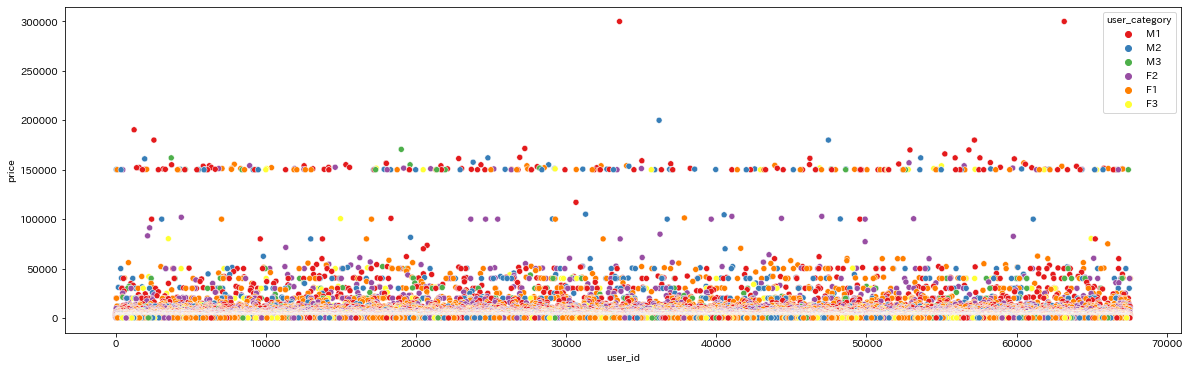

In [42]:
# 散布図を描画する
plt.figure(figsize=(20,6))
sns.scatterplot(x='user_id', y='price', hue='user_category', data=customer, palette='Set1')

77       1
73       1
76       1
75       1
71       2
      ... 
4     1586
3     1993
2     2210
1     4195
0     9518
Name: user_id, Length: 78, dtype: int64


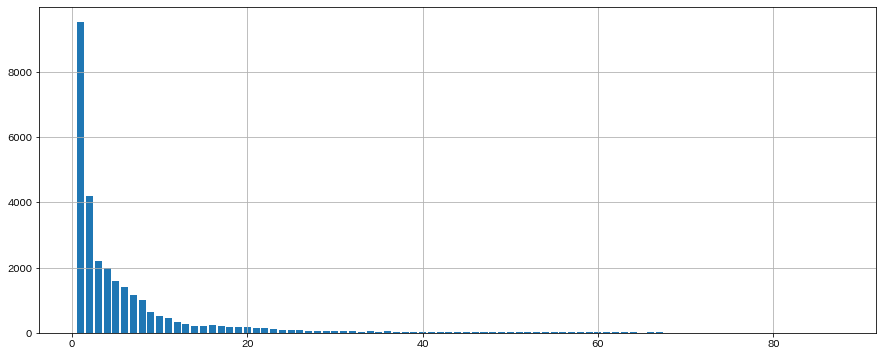

In [43]:
# 購入回数別人数確認
num = pd.DataFrame(customer.groupby('item_cnt').count()).reset_index().sort_values('user_id')
print(num.user_id)
plt.figure(figsize=(15,6))
plt.bar( num["item_cnt"], num['user_id'])
plt.grid(True)
plt.show()
# 購入回数2回目以降はなだらかな推移であるため、この客層の特徴を掴めれば、リピーター予測につながりそう。

* 購入者累計人数 28,509名 (54名含む。予約カウント？)
* 購入回数3以上 14,796名 51.9%
* 購入回数2以下 13,713名 48.1%

In [44]:
# 購入データ内の合計売上個数を確認
data = sum(num.user_id)
print(data)

28509


# 2.主成分分析による特徴量の抽出(全購入者)

In [45]:
customer.head()

,user_id,item_cnt,price,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment,normally,often,sometimes,user_category,Decil_score
0,63168,2,300000.0,0,0,0,0,0,2,1,1,0,M1,1
1,33555,2,300000.0,0,0,0,0,0,2,1,0,1,M1,1
2,36190,2,200000.0,0,0,1,0,0,1,2,0,0,M2,1
3,1229,3,190400.0,0,0,0,1,0,2,2,0,1,M1,1
4,57189,2,180000.0,0,0,0,0,0,2,0,1,1,M1,1


In [46]:
# 機械学習用ライブラリ sklearn（scikit-learn）の decomposition ライブラリから
# 主成分分析用クラス FactorAnalysis をインポート 
from sklearn.decomposition import PCA

# 機械学習用ライブラリ sklearn（scikit-learn）内にあるライブラリ preprocessing から
# 標準化用クラス StandardScaler をインポート 
from sklearn.preprocessing import StandardScaler

# 変数リストを作っておく
columnList = ["item_cnt","price","normally","often","sometimes"]
X = customer.loc[:,columnList]

# X のデータを使い標準化パラメータを獲得してから、X に対して標準化を実施
scaler_X = StandardScaler()
scaler_X.fit( X )
X_std = pd.DataFrame(scaler_X.transform(X), columns=columnList)

In [47]:
# 主成分分析用クラスのインスタンスを生成する
pca_X = PCA()

# 主成分分析を実行する
pca_X.fit(X_std)

PCA()

In [48]:
# 固有値を計算する
pca_X_explained_variance = pd.DataFrame( pca_X.explained_variance_ , columns=["ExplainedVariance"])

# 寄与率・累積寄与率を表示する
i = 0
cumCR = 0
CRList = []
for CR in pca_X.explained_variance_ratio_:
  cumCR = cumCR + CR
  CRList.append([CR,cumCR])
  i = i + 1

pca_X_contRate = pd.DataFrame(CRList,columns=["ContributionRate","CumulativeContributionRate"])
pca_X_contRate

,ContributionRate,CumulativeContributionRate
0,0.604719,0.604719
1,0.200175,0.804894
2,0.095113,0.900007
3,0.091226,0.991232
4,0.008768,1.000000


In [49]:
# 固有ベクトル（主成分）を表示する
pca_X_components = pd.DataFrame(pca_X.components_, columns=columnList)
pca_X_components

,item_cnt,price,normally,often,sometimes
0,0.566015,0.019307,0.479736,0.471545,0.476186
1,-0.038621,0.998737,0.000379,-0.020184,0.025018
2,0.012094,-0.029117,0.262768,-0.809658,0.523844
3,0.009551,0.012576,0.763871,-0.157239,-0.625722
4,0.823346,0.033857,-0.342501,-0.311397,-0.326620


In [50]:
# 主成分得点を計算する
feature = pd.DataFrame( pca_X.transform(X_std) )
feature.columns = ['0', '1', '2', '3', '4']
feature.head()

,0,1,2,3,4
0,-0.279301,18.076823,-0.911075,0.615983,0.505610
1,-0.285946,18.107235,-0.009449,0.308336,0.501929
2,-0.414793,11.952120,-0.010600,1.133229,0.292235
3,-0.051050,11.375367,0.355474,0.711569,0.141522
4,-0.411526,10.726678,-0.516197,-0.378970,0.257475


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


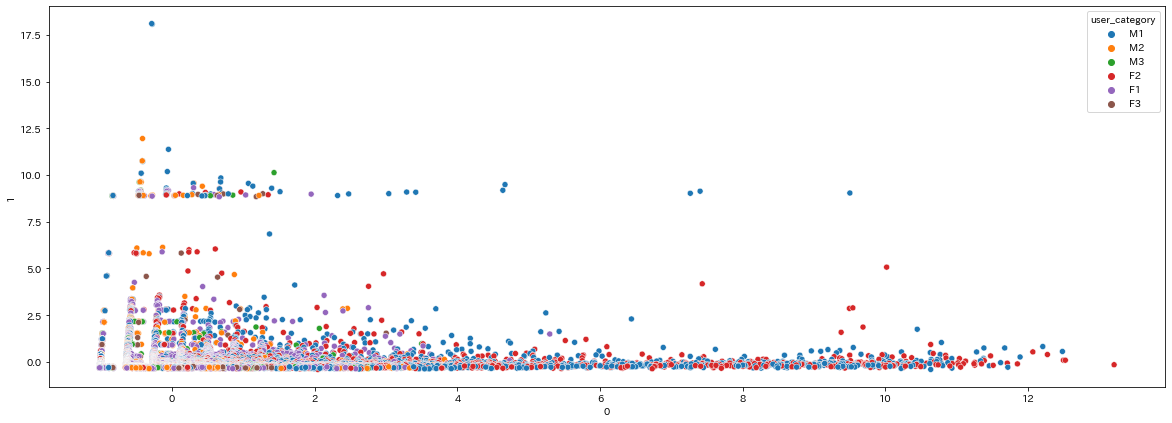

In [51]:
# 第１主成分（0）・第２主成分（1）でプロットを行う。（購入者カテゴリで色分け）
# （日本語フォントの関係で警告が発生するが一旦、気にしない。）
feature["user_category"] = customer["user_category"]
plt.figure(figsize=(20, 7))
sns.scatterplot('0','1',data=feature,hue="user_category")

* 購入金額上位では、20~34歳が目立つ。特に男性が多い傾向。
* 購入回数上位、直近利用頻度上位では、35-49歳女性、20-34歳男性、50歳以上女性が目立つ。

In [52]:
def m_a(x):
    if x['user_category'] == 'M1':
      return 1
    else:
      return 0
customer['m_a'] = customer.apply(m_a,axis=1)

In [53]:
def m_b(x):
    if x['user_category'] == 'M2':
      return 1
    else:
      return 0
customer['m_b'] = customer.apply(m_b,axis=1)

In [54]:
def m_c(x):
    if x['user_category'] == 'M3':
      return 1
    else:
      return 0
customer['m_c'] = customer.apply(m_c,axis=1)

In [55]:
def f_a(x):
    if x['user_category'] == 'F1':
      return 1
    else:
      return 0
customer['f_a'] = customer.apply(f_a,axis=1)

In [56]:
def f_b(x):
    if x['user_category'] == 'F2':
      return 1
    else:
      return 0
customer['f_b'] = customer.apply(f_b,axis=1)

In [57]:
def f_c(x):
    if x['user_category'] == 'F3':
      return 1
    else:
      return 0
customer['f_c'] = customer.apply(f_c,axis=1)

# 3-1.優良顧客フラグ付与

Customer Relationship Management (顧客関係管理)に基づいた5つのセグメント毎に効果的な施策を行い、Life Time Value (顧客生涯価値)と収益の向上を図る。
* A.累計利用回数 上位:3回以上,下位:2回以内
* B.累計金額　　 上位:4以内,下位:5より大きい
* C.直近利用頻度 上位:normally,下位:sometimes
<br>< CRM指数 1~5 ><br>
* A:上位, B:上位, C:上位 → 1.最も優良な顧客
* A:上位, B:下位, C:上位 → 2.Bフォローが必要な顧客
* A:上位, B:上位, C:下位 → 3.離反リスクの高い顧客(早急対応)
* A:下位, B:不問, C:上位 → 4.A,Bフォローで優良顧客へ(成長見込)
* A:下位, B:下位, C:下位 → 5.施策での反応なければ既に離反している可能性が高い

In [58]:
def Royal(x):
    if (x['item_cnt'] >= 3) & (x['Decil_score'] < 5) & (x['normally'] >= 1):
          return 1
    else:
          return 0
customer['Royal'] = customer.apply(Royal,axis=1)

In [59]:
# 優良顧客人数確認
customer4 = pd.DataFrame(customer.groupby('Royal').count()).reset_index()
customer4.user_id

0    23560
1     4949
Name: user_id, dtype: int64

In [60]:
customer5 = customer.query('Royal==1.0')
customer6 = customer5.query(" user_category==['M1','F2'] ")
customer6.user_id.count()

3347

In [61]:
print(customer5.sum())

user_id                                                    169712972
item_cnt                                                       83913
price                                                     52637100.0
Clothing                                                        7461
Accessories                                                      268
HouseGoods                                                       105
Food                                                           28844
Pharmaceuticals                                                 3616
Entertainment                                                    386
normally                                                       15185
often                                                          12464
sometimes                                                      13031
user_category      M1M1M3M1M1M1M1M2M1M1M1F2F1M1M1M1M1M1M1M1M2M1M1...
Decil_score                                                    11993
m_a                               

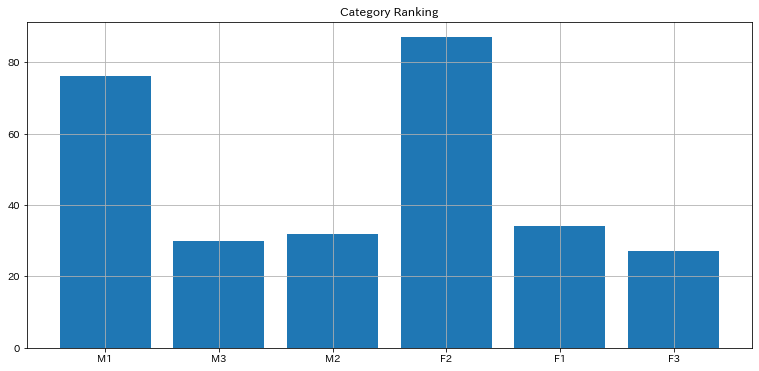

In [62]:
# 購入データ内のカテゴリ別売上金額を確認
plt.figure(figsize=(13,6))
plt.title('Category Ranking')
plt.bar( customer5["user_category"], customer5['item_cnt'])
plt.grid(True)
plt.show()

* 累計顧客 28,509名
* 優良顧客   4,949名 21%

# 3-2.KMeans法によるクラスター分析(全購入者)

※毎回異なる結果が出力されるので注意
*   n_clusters：クラスターの数を指定します。
*   max_iter：（何度か計算をして再現性のチェックをしてアウトプットするのですが）計算の回数を指定します。
* ※ max_iter アルゴリズムは最初のクラスター中心の設定場所によって結果が変わるので何回か計算し再現性をチェックする
*   random_state：分割の閾値を決めるときに乱数を使用する場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [63]:
# KMeans用ライブラリをインポート
from sklearn.cluster import KMeans

# 変数リストを作っておく
columnList = [ 'item_cnt','price', 'normally', 'often',
       'sometimes', 'm_a', 'm_b', 'm_c', 'f_a','f_b', 'f_c']

X = customer.loc[:,columnList]
y = customer.loc[:, 'Royal']

# X のデータを使い標準化パラメータを獲得してから、X に対して標準化を実施
scaler_X = StandardScaler()
scaler_X.fit( X )
X_std = pd.DataFrame(scaler_X.transform(X), columns=columnList)

In [64]:
# KMeans法を実施し、クラスターを構築する
clf = KMeans(n_clusters = 7, max_iter = 50, random_state = 722)
clf.fit(X_std)

KMeans(max_iter=50, n_clusters=7, random_state=722)

In [65]:
# クラスター番号を付与
X_std["Cluster"] = clf.predict(X_std)
# クラスター毎の件数を数える
X_std["Cluster"].value_counts()
# 購入データ内の購入累計人数と一致 28,509名

0    9025
2    6548
5    5161
4    3051
3    2095
6    1415
1    1214
Name: Cluster, dtype: int64

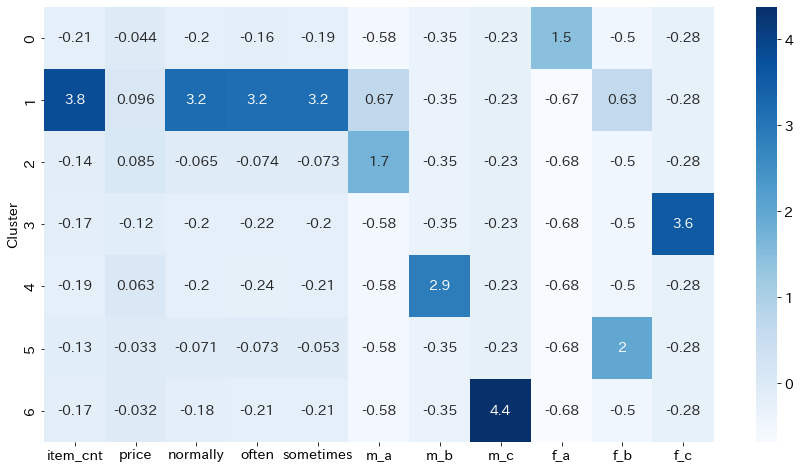

In [66]:
# クラスター毎の特徴を読み取る
plt.rcParams['font.size']=14
plt.figure(figsize=(15,8))
sns.heatmap(X_std.groupby("Cluster").mean(), annot=True, cmap="Blues")

Text(0, 0.5, 'Distortion')

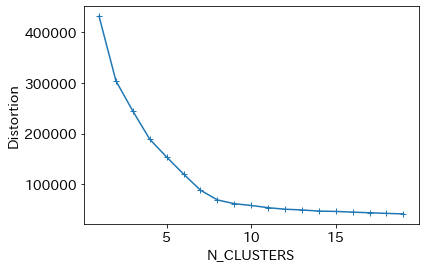

In [67]:
# エルボー法によりクラスター数の検討を行う
dist_list = []
for i in range(1,20):
  clf = KMeans(n_clusters=i, max_iter=20, random_state=722)
  clf.fit(X_std)
  dist_list.append(clf.inertia_)

# グラフ化
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('N_CLUSTERS')
plt.ylabel('Distortion')

In [68]:
# クラスターと優良顧客フラグでクロス集計する
newX = pd.concat([X_std, y], axis = 1)
pd.crosstab(newX['Royal'], newX['Cluster'])

Cluster,0,1,2,3,4,5,6
Royal,,,,,,,
0,7836,33,5339,1972,2856,4200,1324
1,1189,1181,1209,123,195,961,91


In [69]:
# クラスター番号を付与
customer['Cluster'] = newX['Cluster']
# 一人あたりの平均購入金額を優良顧客・クラスター・性別ごとに集計
table2 = customer.groupby(['Royal', 'Cluster', 'user_category'])['price'].mean().reset_index()
table2.sort_values('price', ascending=False)

,Royal,Cluster,user_category,price
14,1,4,M2,19684.102564
16,1,6,M3,15009.890110
9,1,1,F1,13275.000000
12,1,2,M1,12283.043838
13,1,3,F3,12174.796748
8,1,0,F1,10891.673675
15,1,5,F2,9994.172737
11,1,1,M1,7820.813772
10,1,1,F2,6468.215613
3,0,2,M1,5681.120060


* A.累計利用回数 上位:3回以上,下位:2回以内
* B.累計金額　　 上位:4以内,下位:5より大きい
* C.直近利用頻度 上位:oftenまで,下位:sometimes
<br>< CRM指数 1~5 ><br>
* A:上位, B:上位, C:上位 → ①.最も優良な顧客
* A:上位, B:下位, C:上位 → ②.Bフォローが必要な顧客
* A:上位, B:上位, C:下位 → ③.離反リスクの高い顧客(早急対応)
* A:下位, B:不問, C:上位 → ④.A,Bフォローで優良顧客へ(成長見込)
* A:下位, B:下位, C:下位 → ⑤.施策での反応なければ既に離反している可能性が高い

* ラベル0    9025名(1189) 13%.  F1にて構成
* ラベル2    6548名(1209) 18%.  B:最上位 ① M1にて構成
* ラベル5    5161名(961) 18%.  F2にて構成
* ラベル4    3051名(195) 6%  B:最上位 ①＆③ M2にて構成
* ラベル3    2095名(123) 5%  B:下位 F3にて構成
* ラベル6    1415名(91 )6%  M3にて構成
* ラベル1    1214名(1181) 97%  A:最上位,B:最上位,C:最上位 ① M1,F2にて構成 ★★★

# 4.ロジスティック回帰による優良顧客の予測モデル構築

In [70]:
customer.head(2)

,user_id,item_cnt,price,Clothing,Accessories,HouseGoods,Food,Pharmaceuticals,Entertainment,normally,...,user_category,Decil_score,m_a,m_b,m_c,f_a,f_b,f_c,Royal,Cluster
0,63168,2,300000.0,0,0,0,0,0,2,1,...,M1,1,1,0,0,0,0,0,0,2
1,33555,2,300000.0,0,0,0,0,0,2,1,...,M1,1,1,0,0,0,0,0,0,2


In [71]:
customer.columns

Index(['user_id', 'item_cnt', 'price', 'Clothing', 'Accessories', 'HouseGoods',
       'Food', 'Pharmaceuticals', 'Entertainment', 'normally', 'often',
       'sometimes', 'user_category', 'Decil_score', 'm_a', 'm_b', 'm_c', 'f_a',
       'f_b', 'f_c', 'Royal', 'Cluster'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split
# 説明変数と目的変数に分離する
columnList = customer.columns.to_list()
columnList.remove("user_id")
columnList.remove("price")
columnList.remove("user_category")
columnList.remove("Decil_score")
columnList.remove("Royal")
columnList.remove("Cluster")
X = pd.DataFrame( customer.loc[:, columnList] )
y = pd.DataFrame( customer.loc[:, ["Royal"]] )

# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
(X_train, X_test ,y_train, y_test) = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19956, 16)
(19956, 1)
(8553, 16)
(8553, 1)


In [73]:
# サーチする内容を定義する
search_params = [{ 'penalty' : ['l1'] , 'solver' : ['liblinear'] , 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

In [74]:
# 評価関数を定義する
score = 'f1'

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    LogisticRegression(), # 識別器
    search_params, # 最適化したいパラメータセット 
    scoring=score ) # モデルの評価関数の指定

In [76]:
clf.fit(X_train, y_train.values.ravel() )

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'], 'solver': ['liblinear']}],
             scoring='f1')

In [77]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047554,0.001952,0.005688,0.000161,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.533605,0.536188,0.572277,0.501548,0.576809,0.544085,0.027739,7
1,0.499241,0.047857,0.006735,0.001159,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.784851,0.792693,0.786118,0.774142,0.792722,0.786105,0.006810,6
2,0.552604,0.016103,0.005783,0.000396,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.809969,0.818874,0.809077,0.803709,0.824790,0.813284,0.007536,5
3,4.115745,1.199182,0.007453,0.000806,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.812355,0.818802,0.807812,0.804298,0.824695,0.813593,0.007372,1
4,2.510974,0.279159,0.005824,0.000257,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.811728,0.818802,0.807812,0.804598,0.824067,0.813402,0.007134,2
5,0.130546,0.017804,0.005488,0.000284,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.811728,0.818802,0.807812,0.804598,0.824067,0.813402,0.007134,2
6,0.120044,0.018043,0.006261,0.001547,1000,l1,liblinear,"{'C': 1000, 'penalty': 'l1', 'solver': 'liblin...",0.811728,0.818802,0.807812,0.804598,0.824067,0.813402,0.007134,2


In [78]:
# どのモデルが採択されたか確認します。
clf.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [79]:
# ロジスティック回帰分析を実施し、判別モデルを構築する
clf = LogisticRegression(penalty='l1', solver='liblinear', C=10)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [80]:
# 判別モデルの係数を取得する
i = 0
for val in columnList:
    if i > 0:
        preStr = " + "
    else:
        preStr = ""
    print(preStr + str(round(clf.coef_[0][i],4)) + " * "+ val + "(std)")
    i = i + 1
print(" + " + str(clf.intercept_) + " (intercept)")

0.0369 * item_cnt(std)
 + 1.7326 * Clothing(std)
 + 2.1926 * Accessories(std)
 + 2.3394 * HouseGoods(std)
 + -0.0596 * Food(std)
 + 0.9444 * Pharmaceuticals(std)
 + 2.413 * Entertainment(std)
 + 1.3134 * normally(std)
 + 0.5342 * often(std)
 + 0.5576 * sometimes(std)
 + -0.2365 * m_a(std)
 + -0.1202 * m_b(std)
 + 0.0103 * m_c(std)
 + -0.0527 * f_a(std)
 + -0.3215 * f_b(std)
 + 0.0003 * f_c(std)
 + [-7.12531309] (intercept)


偏回帰係数が多いのはEntertainmentの2.4、次いでHouseGoodsの2.2、Accessoriesの2.2、Clothingの1.8  
　　　すなわち、娯楽、家財、衣類・小物、衣料品関連について強化すると、利用が強まる可能性がある。




In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9396672679895771


,predict(0),predict(1)
target(0),16101,382
target(1),822,2651


In [82]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.938618028761838


,predict(0),predict(1)
target(0),6904,173
target(1),352,1124


AUC(train): 0.9732944756369235
AUC(test): 0.9709781160620705
AUC ratio(train/test): 1.0023855940072546


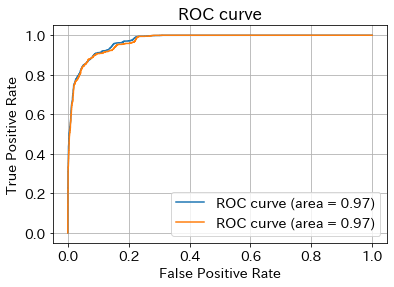

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))

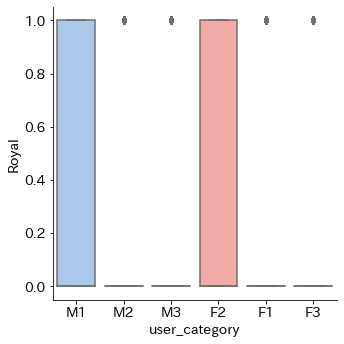

In [84]:
sns.catplot(x='user_category',y='Royal', data=customer, kind='box', palette='pastel')

In [85]:
customer.pivot_table( values="user_id", index="Royal", columns="user_category", aggfunc="count")

user_category,F1,F2,F3,M1,M2,M3
Royal,,,,,,
0,7836,4210,1972,5362,2856,1324
1,1193,1499,123,1848,195,91


*   男性は20-34歳、女性は35-49歳をメインターゲットとすることで優良顧客増加につながりそうだ。

# 5.決定木分析による優良顧客の予測モデル構築

In [86]:
customer.columns

Index(['user_id', 'item_cnt', 'price', 'Clothing', 'Accessories', 'HouseGoods',
       'Food', 'Pharmaceuticals', 'Entertainment', 'normally', 'often',
       'sometimes', 'user_category', 'Decil_score', 'm_a', 'm_b', 'm_c', 'f_a',
       'f_b', 'f_c', 'Royal', 'Cluster'],
      dtype='object')

In [87]:
# 説明変数と目的変数に分離する
columnList = customer.columns.to_list()
columnList.remove("user_id")
columnList.remove("price")
columnList.remove("user_category")
columnList.remove("Decil_score")
columnList.remove("Royal")
columnList.remove("Cluster")
X = pd.DataFrame( customer.loc[:, columnList] )
y = pd.DataFrame( customer.loc[:, ["Royal"]] )

# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
(X_train, X_test ,y_train, y_test) = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19956, 16)
(19956, 1)
(8553, 16)
(8553, 1)


決定木モデルをつくります。
決定木モデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   class_weight：予測するクラスに対して重要度の重みを付ける場合に使う引数ですが、原則 None（重みは平等）で結構です。
*   criterion：分割を決定するのに用いる不純度を決めます。'gini'ならばジニ係数、'entropy'ならばエントロピーを不純度として用います。
*   max_depth：木の最大深さを決めます。Noneの場合は全ての葉が純粋（単独クラス）になるまで木が成長します。（他のパラメータによって停止される可能性はある）
*   max_features：使用する変数の数の上限を決めます。
*   max_leaf_nodes：最大の葉の数をきめます。ここで指定した葉の数以内で、もっともcriterionが低くなるように木が成長します。
*   min_impurity_decrease：ここで設定した値以上のcriterionの減少を引き起こす場合のみ、ノードは分割されるようになります。（criterionの減少に効果的ではない分割が発生しないようになります。）
*   min_impurity_split：使われなくなった引数です。原則、設定しません。（Scikit-learn 0.19以降）
*   min_samples_leaf：１つの葉に必要なサンプルの最小数。ここで指定するよりも小さなサンプル数になってしまう葉は生成させません。
*   min_samples_split：ノードを分割するために必要なサンプルの最小数。ここで指定するよりも小さなサンプル数のノードは分割されません。
*   min_weight_fraction_leaf：葉に必要な（すべての入力サンプルの）重みの合計の最小加重部分。原則、設定不要です。
*   presort：分割の閾値の発見を早めるためにデータを事前にソートしておくかを決めますが、大きいデータだとソートに時間がかかるため、かえって速度が遅くなる可能性もあります。原則、設定不要です。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）
*   splitter：分割の閾値を決める場合に使うアルゴリズムを選択します。原則、設定不要です。

モデルは訓練用データで構築します（X_train_rs_std、y_train_rs）。

In [88]:
from sklearn.tree import DecisionTreeClassifier
# 決定木分析を実施し、判別モデルを構築する
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=1234)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1234)

[Text(0.5, 0.9, 'normally <= 1.5\ngini = 0.286\nsamples = 19956\nvalue = [16506, 3450]'),
 Text(0.25, 0.7, 'Clothing <= 2.5\ngini = 0.128\nsamples = 15314\nvalue = [14266, 1048]'),
 Text(0.125, 0.5, 'item_cnt <= 2.5\ngini = 0.088\nsamples = 14754\nvalue = [14071, 683]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 9284\nvalue = [9284, 0]'),
 Text(0.1875, 0.3, 'Clothing <= 0.5\ngini = 0.219\nsamples = 5470\nvalue = [4787, 683]'),
 Text(0.125, 0.1, 'gini = 0.112\nsamples = 4715\nvalue = [4433, 282]'),
 Text(0.25, 0.1, 'gini = 0.498\nsamples = 755\nvalue = [354, 401]'),
 Text(0.375, 0.5, 'normally <= 0.5\ngini = 0.454\nsamples = 560\nvalue = [195, 365]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 194\nvalue = [194, 0]'),
 Text(0.4375, 0.3, 'gini = 0.005\nsamples = 366\nvalue = [1, 365]'),
 Text(0.75, 0.7, 'Clothing <= 0.5\ngini = 0.499\nsamples = 4642\nvalue = [2240, 2402]'),
 Text(0.625, 0.5, 'Food <= 8.5\ngini = 0.468\nsamples = 3211\nvalue = [2011, 1200]'),
 Text(0.5625, 0.3, 'Pharmaceut

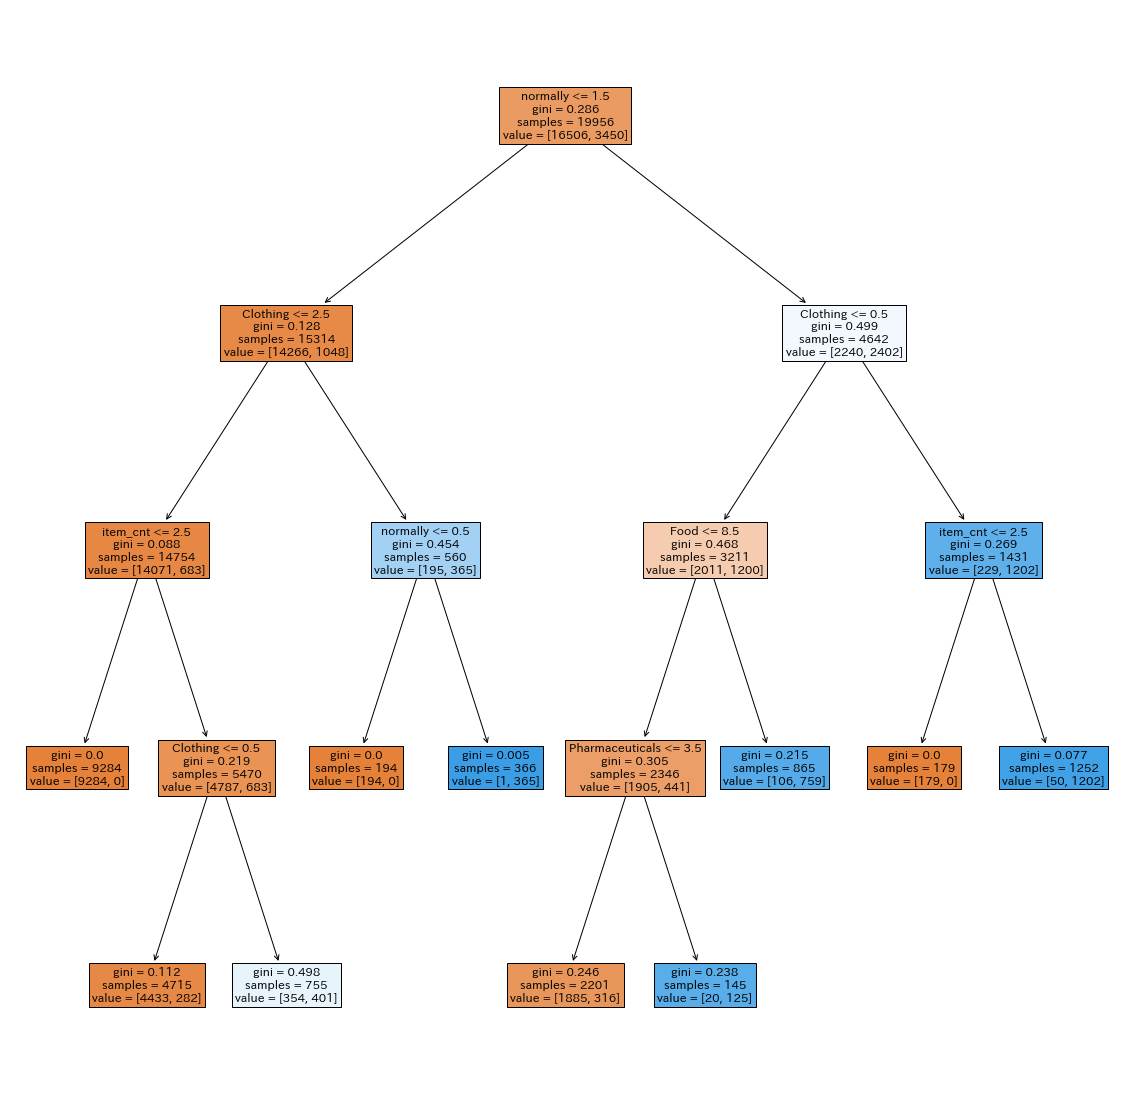

In [89]:
from sklearn.tree import plot_tree
# 構築された決定木を可視化する
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=columnList, filled=True)

In [90]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9434255361795951


,predict(0),predict(1)
target(0),15975,531
target(1),598,2852


In [91]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9459838653104174


,predict(0),predict(1)
target(0),6826,228
target(1),234,1265


AUC(train): 0.9640852513886035
AUC(test): 0.9690301993219939
AUC ratio(train/test): 0.9948970135947772


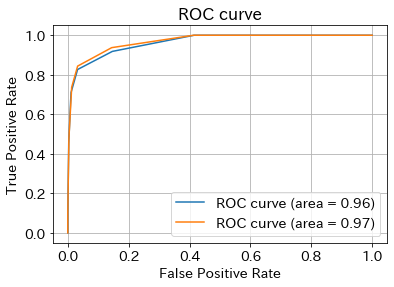

In [92]:
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))